In [1]:
# IMPORTACION DE LIBRERIAS
import numpy as np
import pandas as pd

# LIBRERIAS PARA HACER GRAFICOS
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
# 2 - CARGA DEL FICHERO DE DATOS
file = '/content/ASI_casoPractico.csv'
data = pd.read_csv(file, sep = ';')
data.head()

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,1,240,357,120,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


# **1. Análisis descriptivo de las variables explicativas y el target.**

In [3]:
# 2 - INFORMACION DEL CONJUNTO DE DATOS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2126 non-null   int64  
 1   b         2126 non-null   int64  
 2   e         2126 non-null   int64  
 3   LBE       2126 non-null   int64  
 4   AC        2126 non-null   int64  
 5   FM        2126 non-null   int64  
 6   UC        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   int64  
 12  DS        2126 non-null   int64  
 13  DP        2126 non-null   int64  
 14  DR        2126 non-null   int64  
 15  Width     2126 non-null   int64  
 16  Min       2126 non-null   int64  
 17  Max       2126 non-null   int64  
 18  Nmax      2126 non-null   int64  
 19  Nzeros    2126 non-null   int64  
 20  Mode      2126 non-null   int6

In [4]:
data.dtypes

,0
ID,int64
b,int64
e,int64
LBE,int64
AC,int64
FM,int64
UC,int64
ASTV,int64
MSTV,float64
ALTV,int64


* ID: Identificador único de cada registro.
* b, e, DR: No se especifica su descripción, pero suelen ser valores numéricos reservados para cálculos o identificaciones.
* LBE: Latido Basal Estimado.
* AC: Aceleraciones.
* FM: Movimientos Fetales.
* UC: Contracciones Uterinas.
* ASTV: Tiempo de Variabilidad a Corto Plazo.
* MSTV: Media de la Variabilidad a Corto Plazo.
* ALTV: Tiempo de Variabilidad a Largo Plazo.
* MLTV: Media de la Variabilidad a Largo Plazo.
* DL: No está especificado, podría ser alguna medida de deceleración.
* DS: Desviación Estándar.
* DP: No especificado, podría ser una medida de presión.
* Width: Ancho del vector de tiempo.
* Min: Valor mínimo.
* Max: Valor máximo.
* Nmax: Número de máximos.
* Nzeros: Número de ceros.
* Mode: Moda del ciclo cardíaco.
* Mean: Media del ciclo cardíaco.
* Median: Mediana del ciclo cardíaco.
* Variance: Varianza del ciclo cardíaco.
* Tendency: Tendencia del latido.
* Target: Variable objetivo que indica el estado del feto (normal o anormal).

In [5]:
# NÚMERO DE VALORES ÚNICOS PARA CADA VARIABLE
print(data.agg(['nunique']).T)

          nunique
ID           2126
b             979
e            1064
LBE            48
AC             22
FM             96
UC             19
ASTV           75
MSTV           57
ALTV           87
MLTV          249
DL             15
DS              2
DP              5
DR              1
Width         154
Min           109
Max            86
Nmax           18
Nzeros          9
Mode           88
Mean          103
Median         95
Variance      133
Tendency        3
Target          2


 **Clasifique cada variable según su tipo, cualitativa o cuantitativa discreta o continúa.**
texto en negrita

* Cualitativa: Target (interpretando como una categoría)  Aunque es numérica, representa una categoría que indica el estado (normal o anormal). Por eso, se considera cualitativa.
* Cuantitativa Discreta: ID, b, e, LBE, AC, FM, UC, ASTV, ALTV, DL, DS, DP, Width, Min, Max, Nmax, Nzeros, Mode, Median, Tendency
* Cuantitativa Continua: MSTV, MLTV, Mean, Variance

In [6]:
# MEDIDAS DE CENTRALIZACION, LOCALIZACION Y DISPERION
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2126.0,1063.500000,613.867657,1.0,532.25,1063.5,1594.75,2126.0
b,2126.0,878.439793,894.084748,0.0,55.00,538.0,1521.00,3296.0
e,2126.0,1702.877234,930.919143,287.0,1009.00,1241.0,2434.75,3599.0
LBE,2126.0,133.303857,9.840844,106.0,126.00,133.0,140.00,160.0
AC,2126.0,2.722484,3.560850,0.0,0.00,1.0,4.00,26.0
FM,2126.0,7.241298,37.125309,0.0,0.00,0.0,2.00,564.0
UC,2126.0,3.659925,2.847094,0.0,1.00,3.0,5.00,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.00,49.0,61.00,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.70,1.2,1.70,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.00,0.0,11.00,91.0


In [7]:
# ANÁLISIS DESCRIPTIVO - NULOS
print(data.isnull().sum())

ID          0
b           0
e           0
LBE         0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
Target      0
dtype: int64


In [8]:
# ELIMINAR COLUMNAS NO NECESARIAS
data = data.drop(["ID", "b", "e", "DR"], axis = 1)

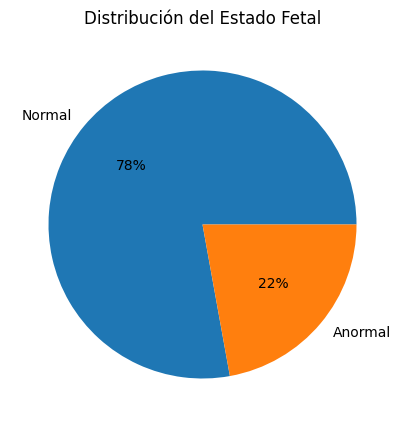

Conteo de Target: Target
0    1655
1     471
Name: count, dtype: int64


In [9]:
# DISTRIBUCIÓN DE FRECUENCIAS DEL TARGET
target_counts = data['Target'].value_counts()
target_labels = ["Normal", "Anormal"]
plt.figure(figsize=(8, 5))
plt.pie(target_counts, labels=target_labels, autopct="%1.0f%%")
plt.title("Distribución del Estado Fetal")
plt.show()
print("Conteo de Target:", target_counts)

**Proporción de estados fetales normales y anormales**
La proporción de estados fetales es:

* Normal: 78%
* Anormal: 22%

In [10]:
# MEDIDAS DE CENTRALIZACIÓN, LOCALIZACIÓN Y DISPERSIÓN
print(data[['FM', 'ALTV', 'Median', 'AC', 'FM', 'UC']].describe().T)

         count        mean        std   min    25%    50%    75%    max
FM      2126.0    7.241298  37.125309   0.0    0.0    0.0    2.0  564.0
ALTV    2126.0    9.846660  18.396880   0.0    0.0    0.0   11.0   91.0
Median  2126.0  138.090310  14.466589  77.0  129.0  139.0  148.0  186.0
AC      2126.0    2.722484   3.560850   0.0    0.0    1.0    4.0   26.0
FM      2126.0    7.241298  37.125309   0.0    0.0    0.0    2.0  564.0
UC      2126.0    3.659925   2.847094   0.0    1.0    3.0    5.0   23.0


 **Obtenga las medidas de centralización, localización y dispersión para las variables:  FM, ALTV y Median.**

1. FM
* Media (mean): 7.24
* Desviación estándar (std): 37.13
* Mínimo (min): 0.0
* 25% Cuartil (25%): 0.0
* Mediana (50%): 0.0
* 75% Cuartil (75%): 2.0
* Máximo (max): 564.0
2. ALTV
* Media (mean): 9.85
* Desviación estándar (std): 18.40
* Mínimo (min): 0.0
* 25% Cuartil (25%): 0.0
* Mediana (50%): 0.0
* 75% Cuartil (75%): 11.0
* Máximo (max): 91.0
3. Median
* Media (mean): 138.09
* Desviación estándar (std): 14.47
* Mínimo (min): 77.0
* 25% Cuartil (25%): 129.0
* Mediana (50%): 139.0
* 75% Cuartil (75%): 148.0
* Máximo (max): 186.0

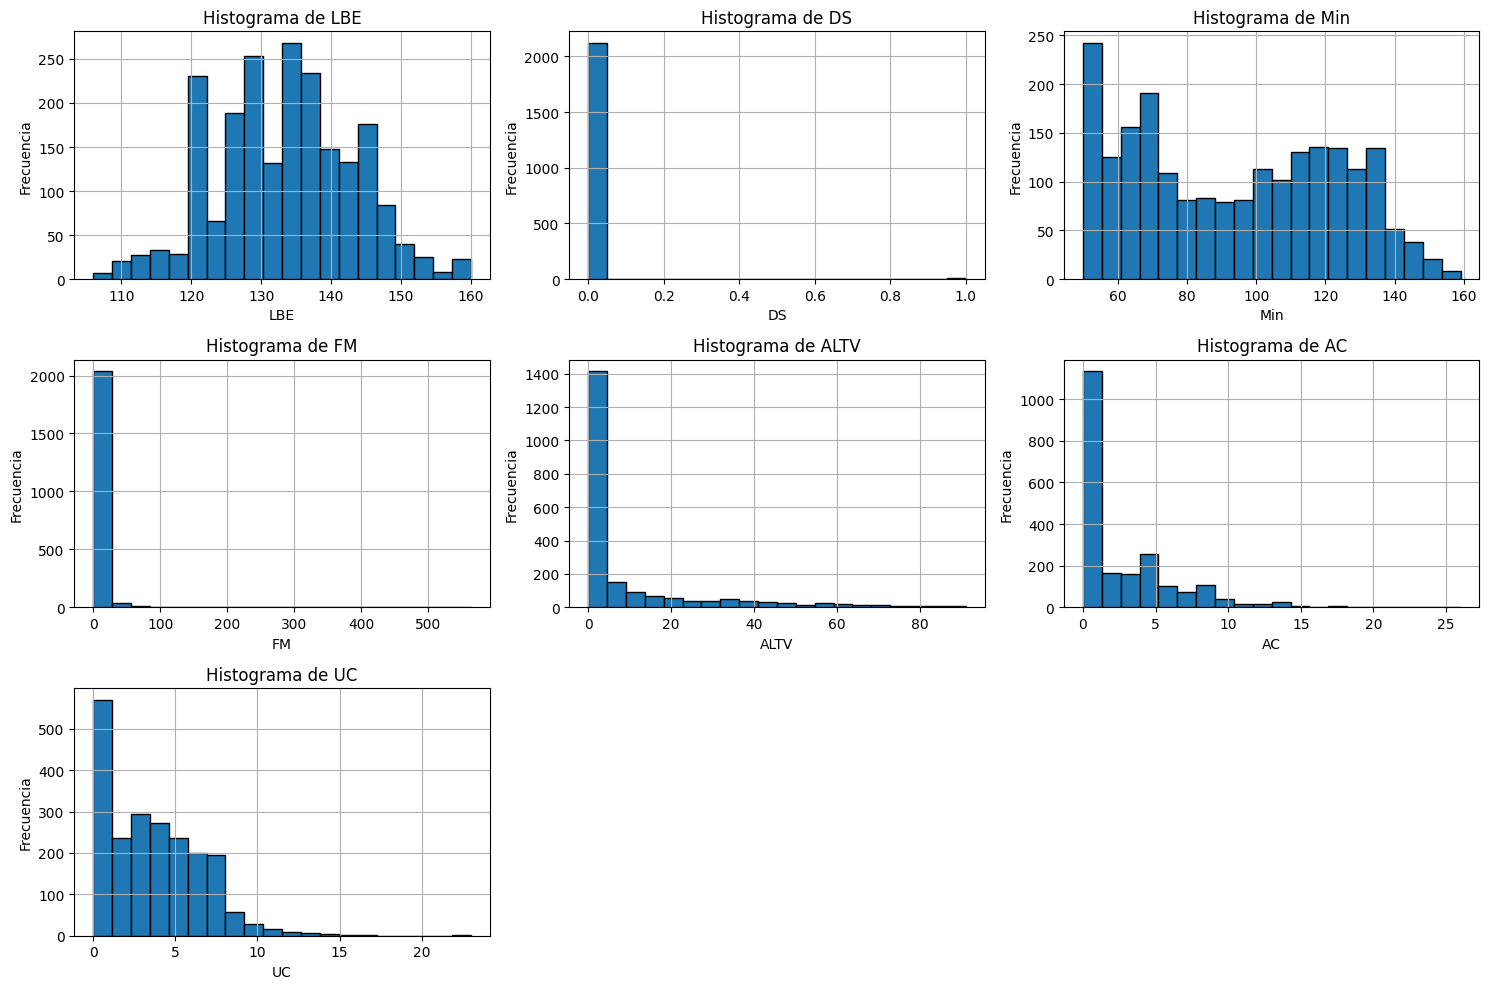

In [16]:
variables_histograma = ['LBE', 'DS', 'Min', 'FM', 'ALTV', 'AC', 'UC']
num_vars = len(variables_histograma)
cols = 3  # Número de columnas por fila
rows = -(-num_vars // cols)  # Cálculo del número de filas (redondeo hacia arriba)

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()  # Convertimos en una lista para iterar fácilmente

for i, variable in enumerate(variables_histograma):
    data[variable].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(f'Histograma de {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frecuencia')

# Ocultar subplots vacíos si hay menos variables que `rows * cols`
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Ajustar el diseño
plt.show()

 **Obtenga el histograma para las variables: LBE, DS y Min.**

1. Histograma de LBE
* Interpretación: Esto sugiere que LBE sigue una distribución bastante equilibrada alrededor de un punto central, con la mayoría de los datos agrupados cerca del promedio.

2. Histograma de DS
* Interpretación: Esto indica que hay poca variabilidad en esta variable, lo que podría significar que la condición medida por DS es consistente o uniforme en la mayoría de los casos.

3. Histograma de Min
* Interpretación: Los valores mínimos tienen una amplia variación y se distribuyen de manera más pareja, indicando diversidad en la medida más baja observada por esta variable.

4. Histograma de FM (Movimientos Fetales):
* Interpretación: Hay una gran cantidad de observaciones con bajos movimientos fetales, y algunos valores atípicos significativos.

5. Histograma de ALTV (Tiempo de Variabilidad a Largo Plazo):
* Interpretación: La variabilidad a largo plazo es baja en la mayoría de los casos, pero algunos registros muestran valores más altos.

6. Histograma de AC (Aceleraciones):
Interpretación: Las aceleraciones son generalmente bajas, con algunas observaciones fuera de lo común.

7. Histograma de UC (Contracciones Uterinas):
Interpretación: La mayoría de las contracciones registradas son mínimas, pero hay casos de contracciones más altas.

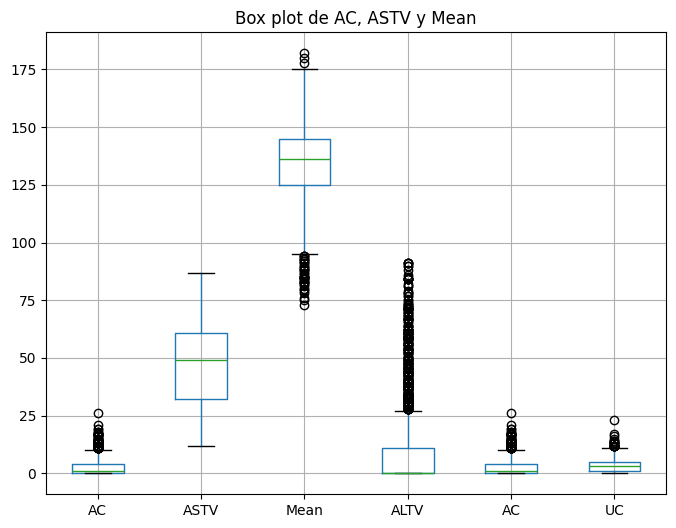

In [ ]:
# BOX-PLOT PARA VARIABLES AC, ASTV Y Mean
variables_boxplot = ['AC', 'ASTV', 'Mean','ALTV', 'AC', 'UC']
plt.figure(figsize=(8, 6))
data[variables_boxplot].boxplot()
plt.title('Box plot de AC, ASTV y Mean')
plt.show()

 **Obtenga un gráfico box-plot para las variables: AC, ASTV y Mean.**

1. AC (Aceleraciones)
* Distribución: La caja es pequeña, indicando poca variabilidad en los datos principales.
* Outliers (valores atípicos): Hay varios, lo que sugiere que aunque la mayoría de los datos están agrupados en un rango pequeño, existen algunos valores bastante altos.

2. ASTV (Tiempo de Variabilidad a Corto Plazo)
* Distribución: La caja es más grande, mostrando más variabilidad en la mitad de los datos.
* Outliers: Menos visibles, pero algunos fuera de los límites.

3. Mean (Promedio de Ciclo Cardiaco)
* Distribución: Amplia variabilidad dentro del rango intercuartílico.
* Mediana: Situada hacia el extremo inferior del rango.
* Outliers: Bastantes valores atípicos por encima del tercer cuartil, mostrando casos que se desvían del valor central esperado

4. AC (Aceleraciones):
* Distribución: Caja pequeña, indicando poca variabilidad en los datos centrales.
* Valores Atípicos: Presentes, sugieren existencia de valores atípicos altos.

5. ASTV (Tiempo de Variabilidad a Corto Plazo):
* Distribución: Caja más grande, mostrando más variabilidad en la mitad de los datos.
* Valores Atípicos: Menos visibles pero presentes fuera de los límites.

6. Mean (Promedio de Ciclo Cardiaco):
* Distribución: Amplia variabilidad dentro del rango intercuartílico.
* Mediana: Situada hacia el extremo inferior del rango.
* Valores Atípicos: Presentes, especialmente por encima del tercer cuartil, mostrando desviaciones del valor central.

In [ ]:

# Seleccionar las columnas donde deseas eliminar outliers
var_outliers = ['AC', 'ASTV', 'Mean', 'UC']

# Eliminar outliers
for var in var_outliers:
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los datos
    data = data[(data[var] >= lower_bound) & (data[var] <= upper_bound)]

# Revisar los datos sin outliers
print(data.describe())

               LBE           AC           FM           UC         ASTV  \
count  1977.000000  1977.000000  1977.000000  1977.000000  1977.000000   
mean    133.448154     2.305008     7.229641     3.471927    46.623166   
std       9.908359     2.808774    37.936740     2.641606    17.391833   
min     106.000000     0.000000     0.000000     0.000000    12.000000   
25%     126.000000     0.000000     0.000000     1.000000    32.000000   
50%     133.000000     1.000000     0.000000     3.000000    47.000000   
75%     141.000000     4.000000     2.000000     5.000000    61.000000   
max     160.000000    10.000000   564.000000    11.000000    87.000000   

              MSTV         ALTV         MLTV           DL           DS  ...  \
count  1977.000000  1977.000000  1977.000000  1977.000000  1977.000000  ...   
mean      1.278300    10.491148     8.559585     1.445625     0.001012  ...   
std       0.855797    18.827043     5.497340     2.377186     0.031798  ...   
min       0.20000

* Identificar las variables explicativas con mayor correlación con el target

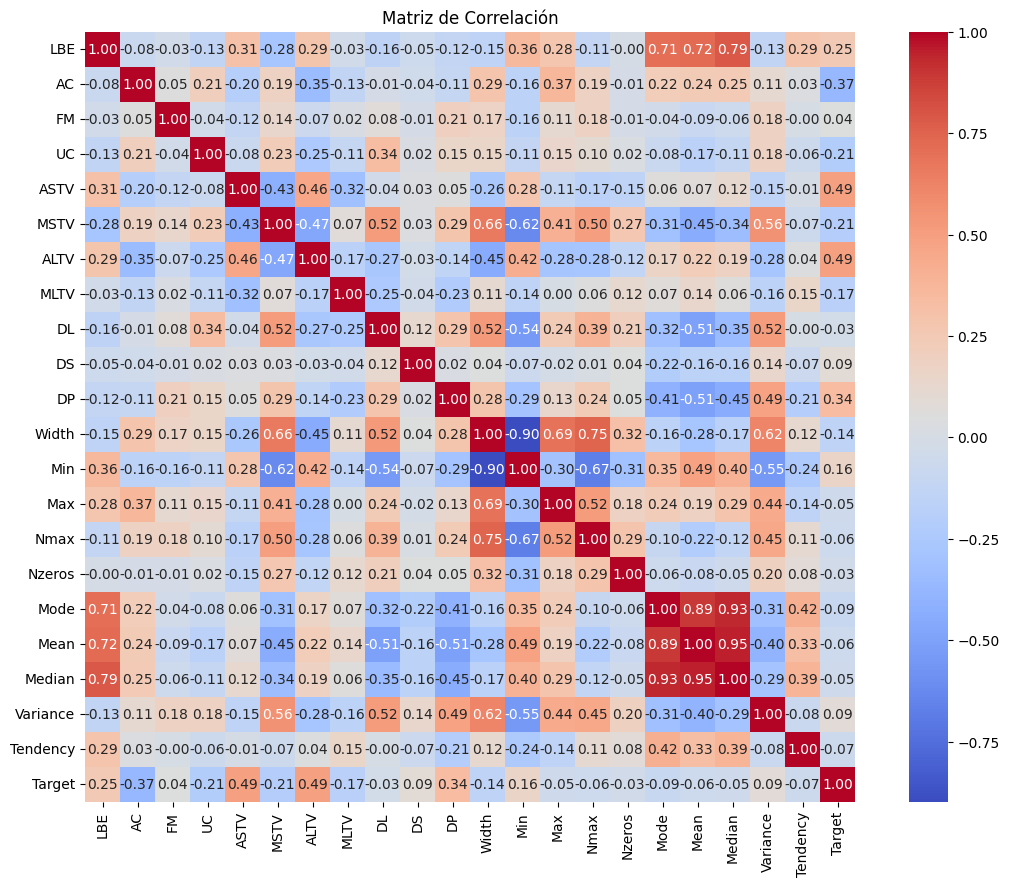

In [17]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Imprimir un resumen de las correlaciones del target
#print(correlation_matrix['Target'].sort_values(ascending=False))

# Visualización de la matriz de correlación completa
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

Las tres variables con mayor correlación con el target son: ['ALTV', 'ASTV', 'AC']


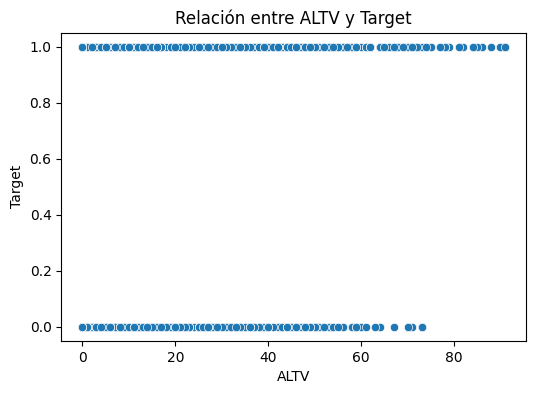

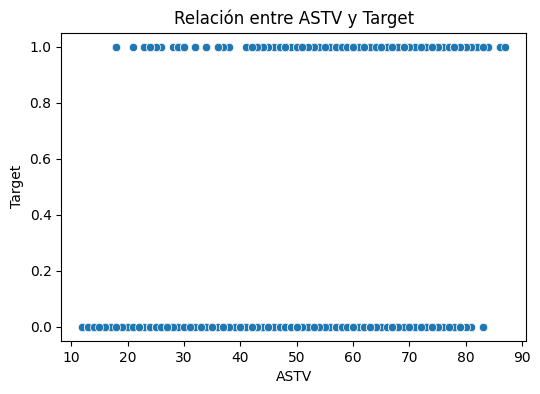

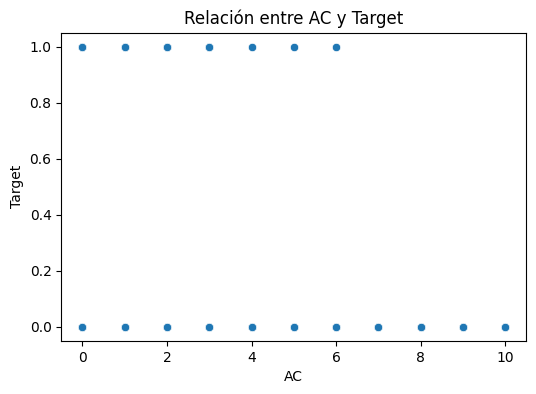

In [ ]:
# Seleccionar las tres variables con mayor correlación positiva
target_correlations = correlation_matrix['Target'].abs().sort_values(ascending=False)
top_three_vars = target_correlations.index[1:4]
print("Las tres variables con mayor correlación con el target son:", top_three_vars.tolist())

# Graficar la relación de estas variables con el target
for var in top_three_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[var], y=data['Target'])
    plt.title(f'Relación entre {var} y Target')
    plt.xlabel(var)
    plt.ylabel('Target')
    plt.show()

In [ ]:
# Calcular las correlaciones con el target
correlations = data.corr()

# Obtener las tres variables con mayor correlación absoluta con el target
target_correlations = correlations['Target'].abs().sort_values(ascending=False)
top_three_vars = target_correlations.index[1:4]
print("Las tres variables con mayor correlación con el target son:", top_three_vars.tolist())

Las tres variables con mayor correlación con el target son: ['ALTV', 'ASTV', 'AC']


# **2. Modelizacion: conjunto de datos en los conjuntos de entrenamiento y test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Definir X e y
X = data.loc[:, data.columns != "Target"]
y = data.loc[:, data.columns == "Target"]

# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

# Verificar las dimensiones
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de entrenamiento (y):", y_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)
print("Tamaño del conjunto de prueba (y):", y_test.shape)

# Modelo de Naive Bayes
gnb = GaussianNB()
modelNB = gnb.fit(X_train, y_train.values.ravel())
y_pred_train_nb = modelNB.predict_proba(X_train)[:, 1]
y_pred_test_nb = modelNB.predict_proba(X_test)[:, 1]

# Modelo SVM
svm_model = SVC(probability=True, random_state=0)
svm_model.fit(X_train, y_train.values.ravel())
y_pred_test_svm = svm_model.predict_proba(X_test)[:, 1]

Tamaño del conjunto de entrenamiento: (1186, 21)
Tamaño del conjunto de entrenamiento (y): (1186, 1)
Tamaño del conjunto de prueba: (791, 21)
Tamaño del conjunto de prueba (y): (791, 1)


# **4. Modelizacion: Ajustar el algoritmo de Naive Bayes.**

In [ ]:
gnb = GaussianNB()

# Ajustar el modelo con los datos de entrenamiento
modelNB = gnb.fit(X_train, y_train.values.ravel())

# Predicción de probabilidades
y_pred_train = modelNB.predict_proba(X_train)[:, 1]
y_pred_test = modelNB.predict_proba(X_test)[:, 1]

print(y_pred_train)
#print(y_pred_test)

[1.51451575e-05 9.98919769e-01 7.60431591e-06 ... 1.91682570e-19
 4.50254828e-05 1.02398992e-12]


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

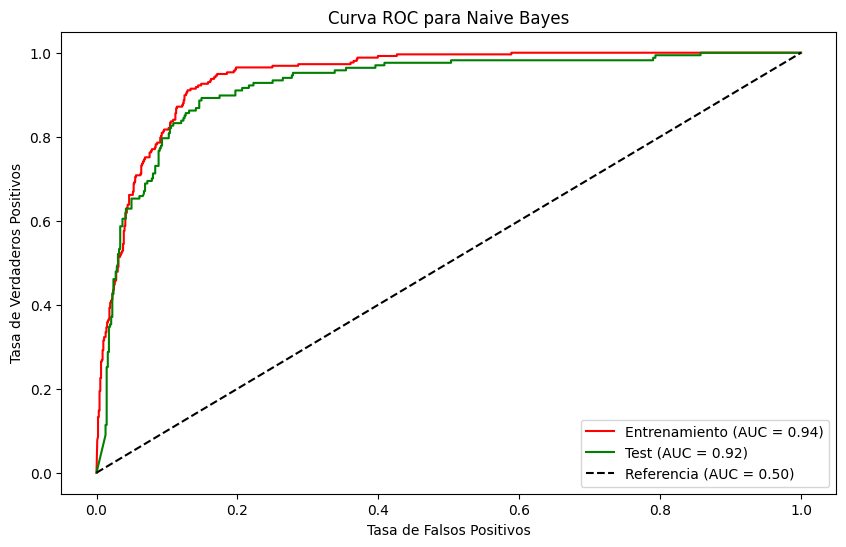

In [ ]:
# Calcular la curva ROC y el área bajo la curva (AUC) para entrenamiento y test
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)

auc_train = roc_auc_score(y_train, y_pred_train)
auc_test = roc_auc_score(y_test, y_pred_test)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Entrenamiento (AUC = {auc_train:.2f})', color='red')
plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {auc_test:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Referencia (AUC = 0.50)')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Naive Bayes')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

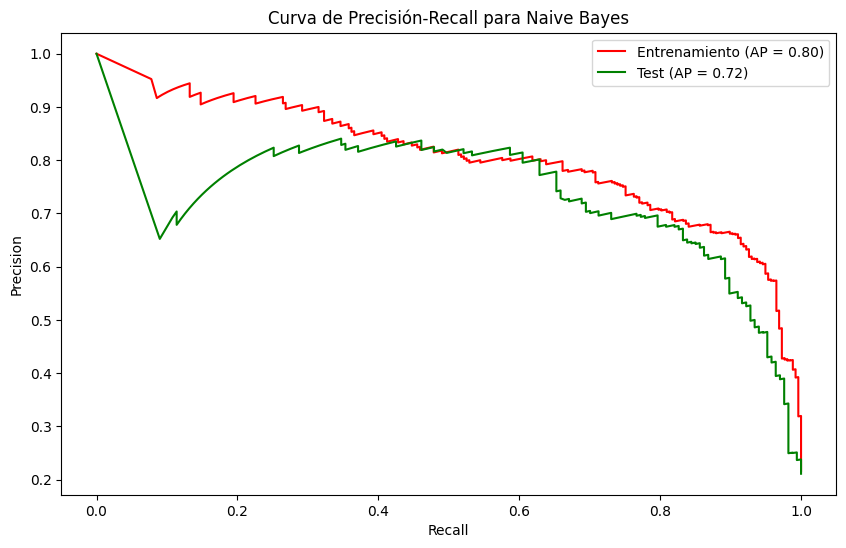

In [ ]:
# Calcular la curva de Precisión-Recall y el área bajo la curva (AP) para entrenamiento y test
precision_train, recall_train, _ = precision_recall_curve(y_train, y_pred_train)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_pred_test)

ap_train = average_precision_score(y_train, y_pred_train)
ap_test = average_precision_score(y_test, y_pred_test)

# Graficar la curva de Precisión-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall_train, precision_train, label=f'Entrenamiento (AP = {ap_train:.2f})', color='red')
plt.plot(recall_test, precision_test, label=f'Test (AP = {ap_test:.2f})', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall para Naive Bayes')
plt.legend(loc='best')
plt.show()

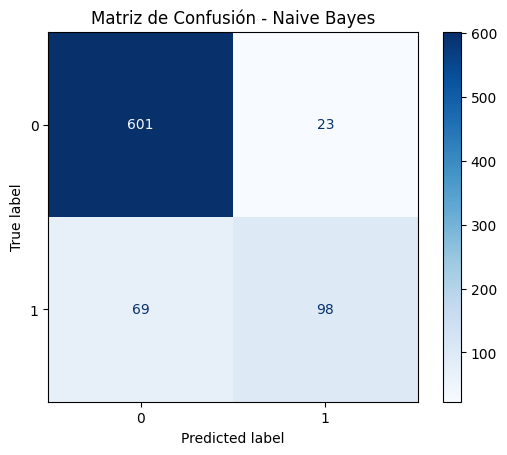

In [ ]:
# Matriz de confusión para Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Graficar matriz de confusión para Naive Bayes
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot(cmap='Blues')
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()

**Conclusión: Análisis de Naive Bayes**

1. Curva ROC:
* Interpretación: La pequeña diferencia entre las AUC de entrenamiento y prueba es positiva, mostrando que el modelo es estable y efectivo.

2. Curva de Precisión-Recall:
* Interpretación: La caída en el área de precisión-recall de entrenamiento a prueba es moderada, lo que sugiere que hay espacio para mejorar en la captura de positivos reales, pero en general el modelo es robusto en ambas métricas.

3. Martiz de confusion:

* Buena precisión: El modelo es bastante correcto en sus predicciones.
* Mejor sensibilidad: El modelo identifica mejor los casos positivos en comparación con el modelo SVM analizado anteriormente.
* Precisión positiva sólida: Indica que las predicciones positivas generalmente son correctas con mayor frecuencia.

El modelo Naive Bayes demuestra un buen desempeño tanto en entrenamiento como en prueba, con alta AUC y un desempeño sólido de precisión-recall. Sigue existiendo un balance razonable entre precisión y recall, asegurando que el modelo es confiable y efectivo para la clasificación. Esto lo hace adecuado para aplicaciones donde la diferenciación de clases es crucial.

# **5. Clasificación con Support Vector Machine (SVM)**

In [ ]:
# Ajustar un modelo SVM
svm_model = SVC(probability=True, random_state=0)
svm_model.fit(X_train, y_train.values.ravel())

# Predicciones de probabilidad con SVM
y_pred_test_svm = svm_model.predict_proba(X_test)[:, 1]

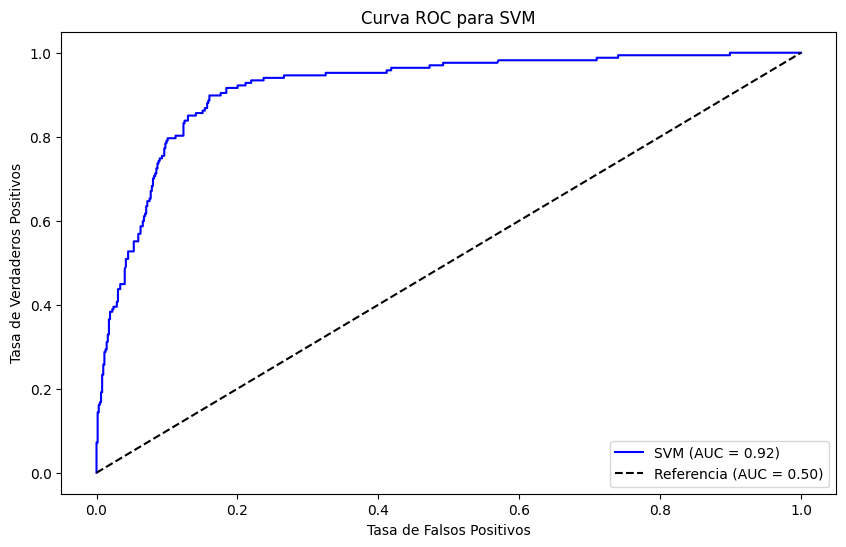

AUC del modelo SVM en test: 0.92


In [ ]:
# Obtener la curva ROC y el área bajo la curva (AUC) para SVM en el conjunto de test
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_test_svm)
auc_svm = roc_auc_score(y_test, y_pred_test_svm)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Referencia (AUC = 0.50)')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para SVM')
plt.legend(loc='best')
plt.show()

# Imprimir resultados
print(f"AUC del modelo SVM en test: {auc_svm:.2f}")

In [ ]:
# Predicciones de probabilidad para el conjunto de prueba
y_pred_test_svm = svm_model.predict_proba(X_test)[:, 1]

# Calcular la curva de Precisión-Recall y el área bajo la curva (AP) para SVM
precision_test_svm, recall_test_svm, _ = precision_recall_curve(y_test, y_pred_test_svm)
ap_test_svm = average_precision_score(y_test, y_pred_test_svm)

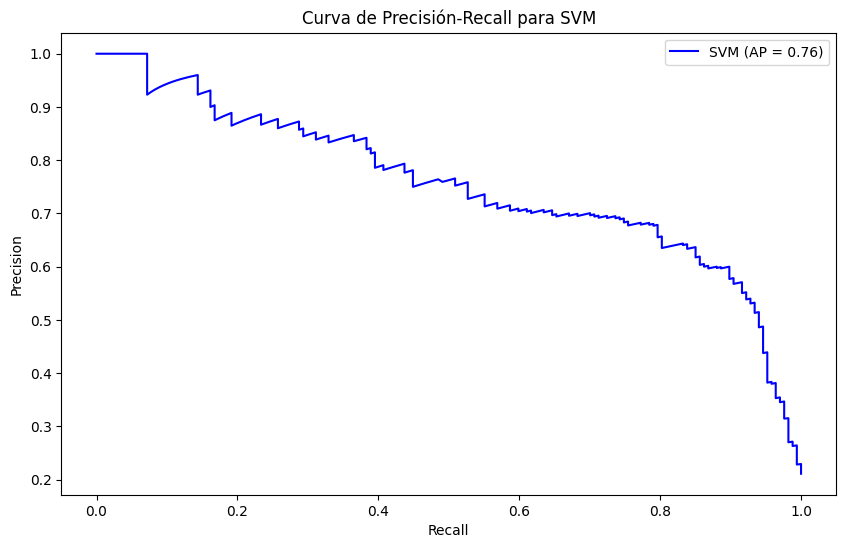

Área Promedio bajo la curva (AP) para SVM en test: 0.76


In [ ]:

# Graficar la curva de Precisión-Recall para SVM
plt.figure(figsize=(10, 6))
plt.plot(recall_test_svm, precision_test_svm, label=f'SVM (AP = {ap_test_svm:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall para SVM')
plt.legend(loc='best')
plt.show()

# Imprimir el área promedio bajo la curva
print(f"Área Promedio bajo la curva (AP) para SVM en test: {ap_test_svm:.2f}")

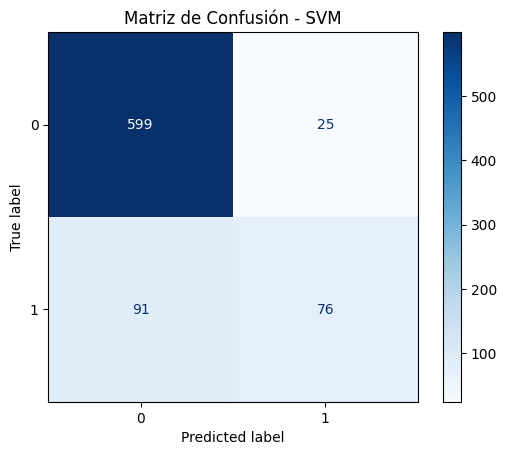

In [ ]:
# Predicciones con SVM
y_pred_svm = svm_model.predict(X_test)

# Matriz de confusión para SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Graficar matriz de confusión para SVM
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap='Blues')
plt.title("Matriz de Confusión - SVM")
plt.show()

**Conclucion: Análisis de SVM**
1. Curva ROC:
AUC (0.92): Una AUC cercana a 1 significa que el modelo es eficaz en predecir correctamente tanto los falsos positivos como los verdaderos positivos.

2. Curva de Precisión-Recall:
AP (0.76): Indica un buen equilibrio entre precisión y recall, aunque hay margen para mejorar.

3. Matriz de confusión
* Alta precisión: El modelo es generalmente correcto en sus predicciones.
* Baja sensibilidad: El modelo no logra identificar correctamente muchos de los casos positivos.
* Precisión positiva razonable: Indica que cuando el modelo predice positivo, suele tener razón con buena frecuencia.

Conclusión
El modelo SVM tiene un rendimiento sólido, con una buena capacidad de generalización reflejada en las métricas AUC y AP. Es fiable para tareas de clasificación en este conjunto de datos, aunque podría ser optimizado para mejorar su precisión.

# **5. Mejoramos modelo SVM con GridSearchCV**

In [ ]:
# Definición del espacio de hiperparámetros para GridSearchCV
param_grid = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [0.1, 1, 10]},  # Kernel RBF
    {"kernel": ["linear"], "C": [0.1, 1, 10]},                     # Kernel Linear
    {"kernel": ["poly"], "C": [0.1, 1, 10], "degree": [2, 3]},     # Kernel Polynomial
]

# Configuración y ajuste del GridSearchCV
grid = GridSearchCV(
    estimator=SVC(probability=True),  # Activamos probability=True para curvas ROC
    param_grid=param_grid,
    scoring='roc_auc',  # Métrica: AUC
    n_jobs=-1,
    cv=3,
    verbose=0,
    return_train_score=True
)

# Ajustar el modelo en el conjunto de entrenamiento
grid.fit(X_train, y_train.values.ravel())

# Mostrar los mejores parámetros encontrados
best_params = grid.best_params_
print("Mejores parámetros encontrados:", best_params)

Mejores parámetros encontrados: {'C': 1, 'kernel': 'linear'}


In [ ]:
# Reentrenar el modelo SVM con los mejores parámetros
best_svm_model = SVC(probability=True, **best_params)
best_svm_model.fit(X_train, y_train.values.ravel())

SVC(C=1, kernel='linear', probability=True)

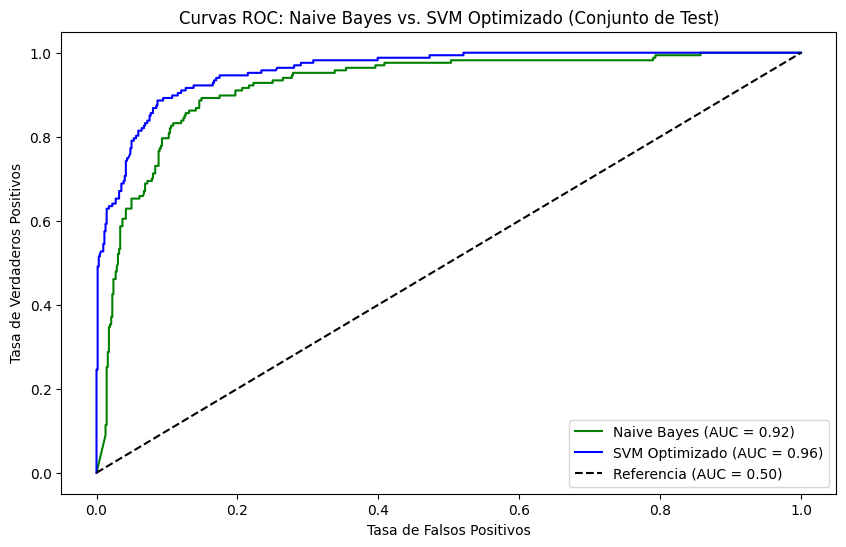

AUC del modelo Naive Bayes en test: 0.92
AUC del modelo SVM optimizado en test: 0.96


In [ ]:
# Predicciones de probabilidad en el conjunto de test
y_pred_test_svm_optimized = best_svm_model.predict_proba(X_test)[:, 1]

# Obtener la curva ROC y el AUC para el modelo SVM optimizado en el conjunto de test
fpr_svm_optimized, tpr_svm_optimized, _ = roc_curve(y_test, y_pred_test_svm_optimized)
auc_svm_optimized = roc_auc_score(y_test, y_pred_test_svm_optimized)

# Graficar la comparación de curvas ROC (Naive Bayes vs SVM optimizado)
plt.figure(figsize=(10, 6))
plt.plot(fpr_test, tpr_test, label=f'Naive Bayes (AUC = {auc_test:.2f})', color='green')  # Naive Bayes
plt.plot(fpr_svm_optimized, tpr_svm_optimized, label=f'SVM Optimizado (AUC = {auc_svm_optimized:.2f})', color='blue')  # SVM optimizado
plt.plot([0, 1], [0, 1], 'k--', label='Referencia (AUC = 0.50)')  # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC: Naive Bayes vs. SVM Optimizado (Conjunto de Test)')
plt.legend(loc='best')
plt.show()

# Imprimir resultados finales
print(f"AUC del modelo Naive Bayes en test: {auc_test:.2f}")
print(f"AUC del modelo SVM optimizado en test: {auc_svm_optimized:.2f}")

[[594  30]
 [ 38 129]]


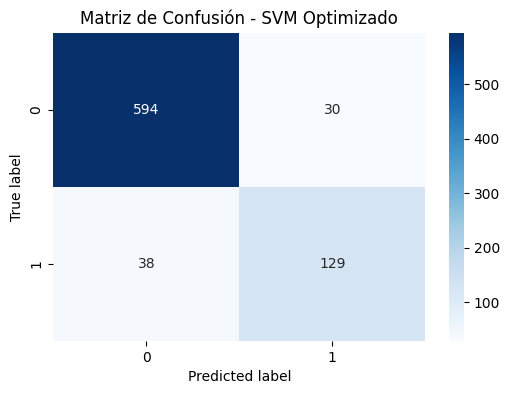

In [ ]:
# Matriz de confusión del SVM optimizado muestra
y_pred_svm_optimized = best_svm_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_svm_optimized)
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - SVM Optimizado')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# **6. Conclusiones Generales:**

* SVM Optimizado supera a Naive Bayes con mejor AUC (0.96 vs 0.92).
* Logra un mejor equilibrio entre precisión y sensibilidad.
* Menos falsos negativos y positivos en la matriz de confusión.
* Mejor discriminación en la curva ROC.
* Más adecuado para tareas de clasificación complejas
